In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [15]:
df_severity = pd.read_csv("Symptom-severity.csv")

In [16]:
df_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


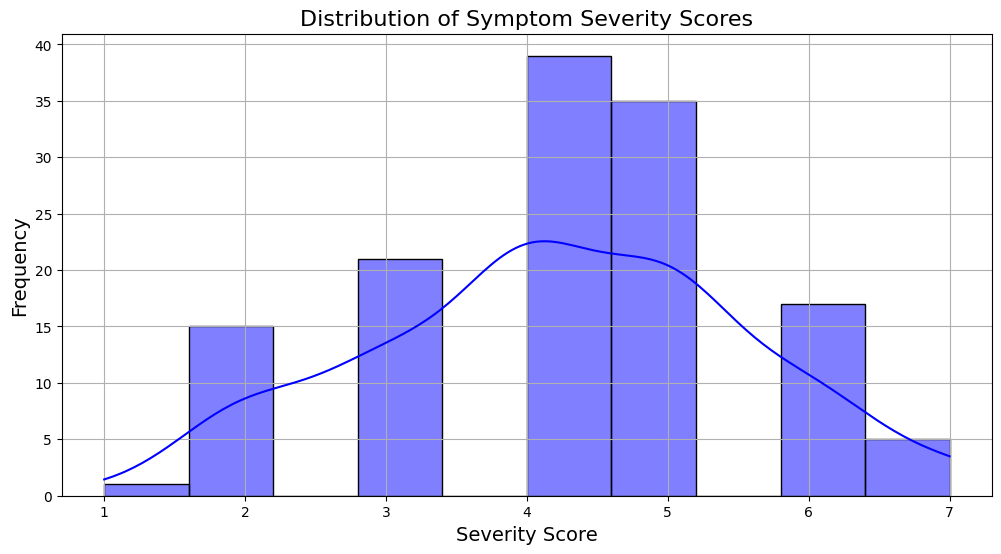

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df_severity["weight"], bins=10, kde=True, color="blue")
plt.xlabel("Severity Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Symptom Severity Scores", fontsize=16)
plt.grid(True)

plt.show()

In [18]:
### Random Forest Regressor ###

In [19]:
# Encoding the 'Symptom'
le = LabelEncoder()
df_severity['Symptom'] = le.fit_transform(df_severity['Symptom'])
label_encoders = le

In [20]:
# Defining features (X) and target (y)
X = df_severity[['Symptom']] 
y = df_severity['weight']     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initializing Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred_rounded = np.round(y_pred).astype(int)  
z = label_encoders.inverse_transform(y_pred_rounded)
print(X_test)
print(y_pred)
print(z)

     Symptom
51       117
69       114
31        44
42       129
117       42
77       102
127      103
56        18
40        31
12        17
81       106
26       109
108       95
100        7
66        16
83        66
4         97
27        14
19       127
123        8
36        75
16         5
18        65
10        69
65        27
44         3
11       122
[4.92 6.37 5.42 3.27 5.37 3.36 5.07 3.84 3.79 4.52 5.96 4.85 4.22 3.22
 4.82 3.95 2.26 4.99 3.41 3.83 4.29 2.4  5.03 2.25 4.04 2.93 3.44]
['anxiety' 'back_pain' 'anxiety' 'acute_liver_failure' 'anxiety'
 'acute_liver_failure' 'anxiety' 'altered_sensorium' 'altered_sensorium'
 'anxiety' 'back_pain' 'anxiety' 'altered_sensorium' 'acute_liver_failure'
 'anxiety' 'altered_sensorium' 'acidity' 'anxiety' 'acute_liver_failure'
 'altered_sensorium' 'altered_sensorium' 'acidity' 'anxiety' 'acidity'
 'altered_sensorium' 'acute_liver_failure' 'acute_liver_failure']


In [22]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 2.92
Mean Absolute Error (MAE): 1.46
R-squared: -1.11
